In [27]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [28]:
data = pd.read_csv("../../../../Desktop/film_reviews.csv")
data

,review,note,label
0,"As a woman that grew up with Barbie, I was ver...",6.0,pos
1,"Margot does the best with what she's given, bu...",6.0,pos
2,"I do not usually write reviews, but this is be...",NaN,
3,As much as it pains me to give a movie called ...,10.0,pos
4,I've been excited for this movie for over a ye...,6.0,pos
5,I thought this would be so much different. The...,8.0,pos
6,"Before making Barbie (2023), Greta Gerwig sing...",6.0,pos
7,"Wow, this movie was a love letter to cinema. F...",9.0,pos
8,"The quality, the humor, and the writing of the...",6.0,pos
9,"I went to see this today, everyone in my group...",4.0,neg


In [29]:
 nlp = spacy.load('en_core_web_sm')

for review in data['review']:
    doc = nlp(review)
    for token in doc:
        print(f'"{token.text}", Lemme: {token.lemma_}, POS: {token.pos_}, Dépendance: {token.dep_}')

"As", Lemme: as, POS: ADP, Dépendance: prep
"a", Lemme: a, POS: DET, Dépendance: det
"woman", Lemme: woman, POS: NOUN, Dépendance: pobj
"that", Lemme: that, POS: PRON, Dépendance: nsubj
"grew", Lemme: grow, POS: VERB, Dépendance: relcl
"up", Lemme: up, POS: ADP, Dépendance: prt
"with", Lemme: with, POS: ADP, Dépendance: prep
"Barbie", Lemme: Barbie, POS: PROPN, Dépendance: pobj
",", Lemme: ,, POS: PUNCT, Dépendance: punct
"I", Lemme: I, POS: PRON, Dépendance: nsubj
"was", Lemme: be, POS: AUX, Dépendance: ROOT
"very", Lemme: very, POS: ADV, Dépendance: advmod
"excited", Lemme: excited, POS: ADJ, Dépendance: acomp
"for", Lemme: for, POS: ADP, Dépendance: prep
"this", Lemme: this, POS: DET, Dépendance: det
"movie", Lemme: movie, POS: NOUN, Dépendance: pobj
".", Lemme: ., POS: PUNCT, Dépendance: punct
"I", Lemme: I, POS: PRON, Dépendance: nsubj
"was", Lemme: be, POS: AUX, Dépendance: ROOT
"curious", Lemme: curious, POS: ADJ, Dépendance: acomp
"to", Lemme: to, POS: PART, Dépendance: aux
"se

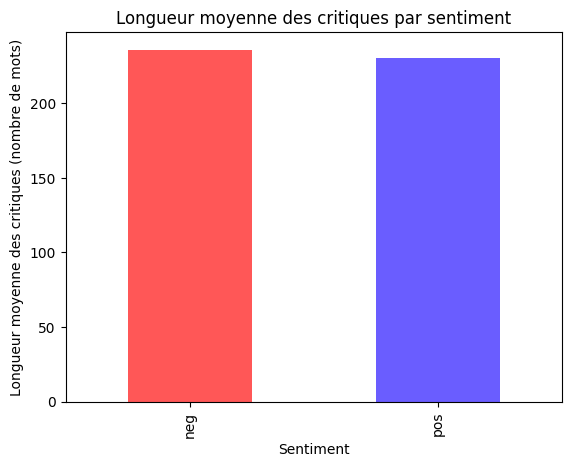

In [30]:
def longueur_review(review):
    return len(review.split())
    
data['note'] = pd.to_numeric(data['note'])
data = data.dropna(subset=['note'])

def calcul_longueur_moyenne_critiques(reviews):
    longueurs = [longueur_review(review) for review in reviews]
    return pd.Series(longueurs).mean()

longueur_moyenne = data.groupby('label')['review'].apply(calcul_longueur_moyenne_critiques)

longueur_moyenne.plot(kind='bar', color=['#FF5757', '#6A5DFF'])
plt.title('Longueur moyenne des critiques par sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Longueur moyenne des critiques (nombre de mots)')
plt.show()



--------------------------------
mode: two-sided
Pearson: -1.3592e-01; p-value: +5.4642e-01
Spearman: -1.1589e-01; p-value: +6.0753e-01
--------------------------------
mode: greater
Pearson: -1.3592e-01; p-value: +5.4642e-01
Spearman: -1.1589e-01; p-value: +6.0753e-01
--------------------------------
mode: less
Pearson: -1.3592e-01; p-value: +5.4642e-01
Spearman: -1.1589e-01; p-value: +6.0753e-01


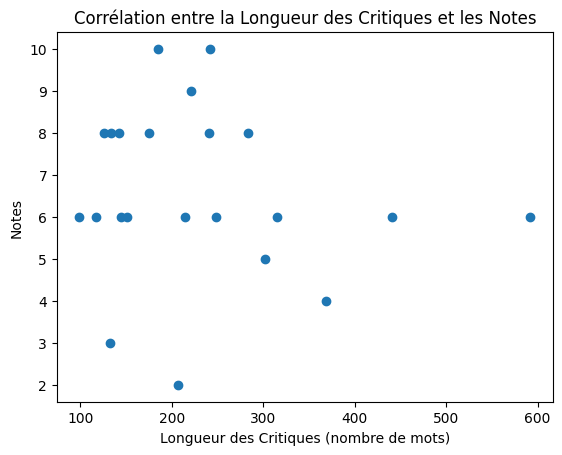

In [31]:
longueurs_reviews = [longueur_review(review) for review in data['review']]
notes = data['note'].values

for mode in ["two-sided", "greater", "less"]:
    print("-" * 32)
    print("mode:", mode)
    corr_pearson, p_pearson = scipy.stats.pearsonr(longueurs_reviews, notes)
    print(f"Pearson: {corr_pearson:+.4e}; p-value: {p_pearson:+.4e}")
    corr_spearman, p_spearman = scipy.stats.spearmanr(longueurs_reviews, notes)
    print(f"Spearman: {corr_spearman:+.4e}; p-value: {p_spearman:+.4e}")

plt.scatter(longueurs_reviews, notes)
plt.xlabel("Longueur des Critiques (nombre de mots)")
plt.ylabel("Notes")
plt.title("Corrélation entre la Longueur des Critiques et les Notes")
plt.show()

In [34]:
data_clean = data[(data['review'].apply(longueur_review) >= 10) & (data['review'].apply(longueur_review) <= 500)]


In [35]:
train_data, test_data = train_test_split(data_clean, test_size=0.1, random_state=123)

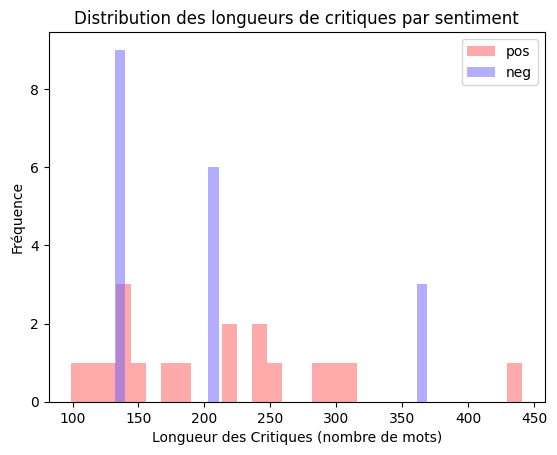

In [40]:
for label, color in zip(data_resampled['label'].unique(), ['#FF5757', '#6A5DFF']):
    subset = data_resampled[data_resampled['label'] == label]
    plt.hist(subset['review_length'], bins=30, alpha=0.5, label=label, color=color)

plt.title('Distribution des longueurs de critiques par sentiment')
plt.xlabel('Longueur des critiques (nombre de mots)')
plt.ylabel('Fréquence')
plt.legend()
plt.show()